In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters, exposure
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

c:\Users\vinee\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


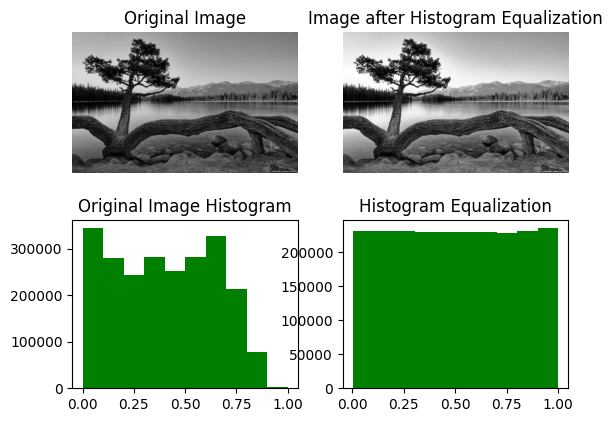

In [2]:
#Histogram Equalization

image = rgb2gray(imread("image1.jpg"))
image_exp = exposure.equalize_hist(image)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(image_exp, cmap="gray")
plt.title("Image after Histogram Equalization")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.hist(image.ravel(), color='g')
plt.title("Original Image Histogram")

plt.subplot(2, 2, 4)
plt.hist(image_exp.ravel(), color='g')
plt.title("Histogram Equalization")

plt.show()

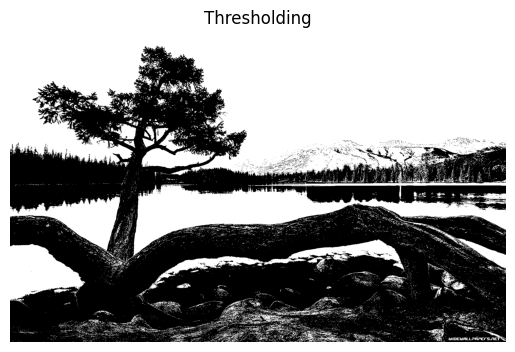

In [3]:
#Thresholding

thresh = filters.threshold_otsu(image)
binary_image = image > thresh

plt.imshow(binary_image, cmap="gray")
plt.title("Thresholding")
plt.axis('off')
plt.show()

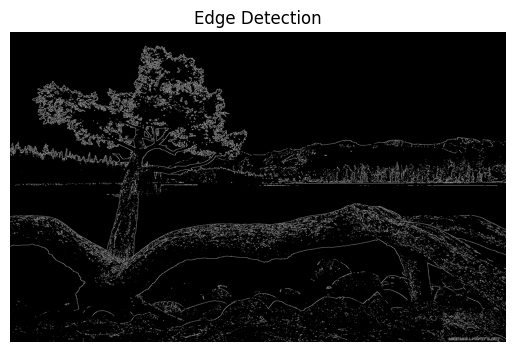

In [4]:
#Edge Detection

image = cv2.imread("image1.jpg")
edge = cv2.Canny(image, 300, 300)

plt.imshow(edge, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

In [5]:
#Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
image = load_img("image1.jpg")
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

In [7]:
num_images = 10
augmented_images = []

for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    augmented_images.append(array_to_img(batch[0]))

    if i >= num_images - 1:
        break

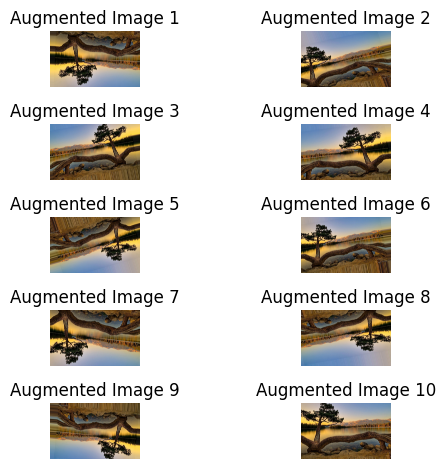

In [8]:
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
    plt.title(f"Augmented Image {i+1}")

plt.tight_layout()
plt.show()

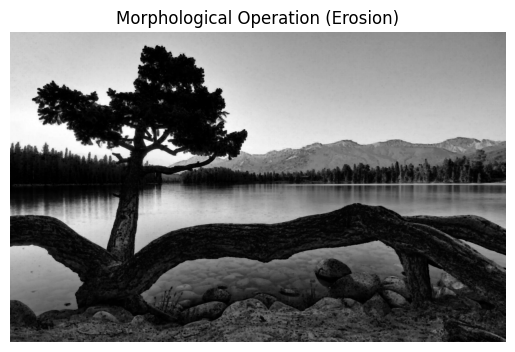

In [9]:
image = cv2.imread("image1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)

eroded_image = cv2.erode(image, kernel)

plt.imshow(eroded_image, cmap="gray")
plt.axis('off')
plt.title("Morphological Operation (Erosion)")
plt.show()